# Variables cuantitativas de entrada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


In [3]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-3-25c314eaf7dc>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [8]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-8-34b7e6819ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [9]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [10]:
# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"])
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,6,1,1


In [11]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
25,3,6,1
8,1,6,2
19,2,6,3
11,3,0.0,1
11,2,6,1
...,...,...,...
41,3,6,1
54,3,0.0,1
68,3,6,9


In [18]:
sc=StandardScaler()
# scaler = sc.fit(trainX)
# trainX_scaled = scaler.transform(trainX)
# testX_scaled = scaler.transform(testX)
import random
#Numero de capas ocultas
CO = random.sample(range(3, 25), k=1)
#Numero de nodos
NN = random.sample(range(3, 25), k=1)
CO, NN
#Dado en la primera (CO = [4], NN= [13])

([4], [13])

# Variables cualitativas de entrada
La forma correcta de analizar las variables. Como son variables cualitativas, podemos transformar cada variable cualitativa en un conjunto de variables Dummie.

In [37]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido", "Guerra"]
dummi4 = pd.get_dummies(x['T_GES'], dtype=float)
dummi4.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2,  dummi4,y], axis=1)
dummi.head(4)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [87]:
x1 = dummi.drop("PESO_NAC", axis=1)
x1
y1 = dummi["PESO_NAC"]
y1.columns = ["< 1 Kg", "1-1.5 Kg", "1.5-2 Kg", "2-2.5 Kg", "2.5-3 Kg", "3-3.5 Kg", "3.5-4 Kg", "> 4 Kg", "Kg desco"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,Guerra,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,,
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
70,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [104]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(13,13,13,13),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13), max_iter=500)

In [105]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred1)))

Exactitud: 0.75


In [106]:
#no_obs = np.array([[1.0,	1.0,	4.0]])
#mlp_clf1.predict(no_obs)

In [113]:
from sklearn.metrics import confusion_matrix
import pylab as pl


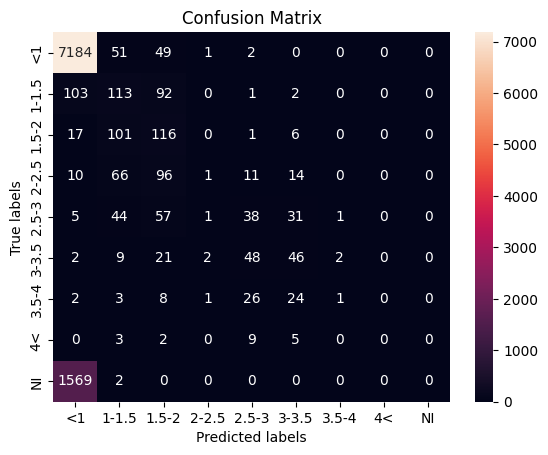

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test2, y_pred1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);
ax.yaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);

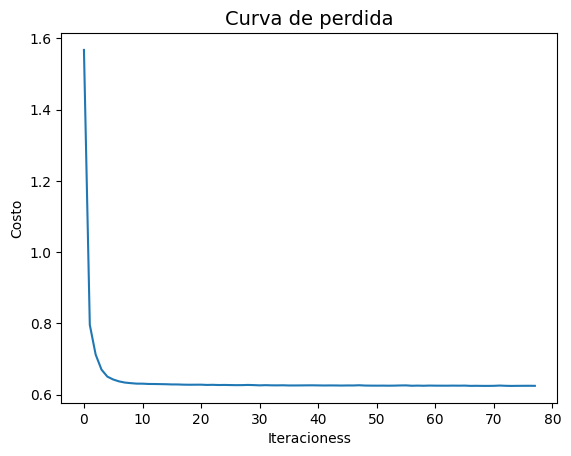

In [109]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

In [139]:
no_obs1 = np.array([
    [1, 0, 1,
     1, 0,0, 0, 0, 0,0,
     0 ,0, 0, 1, 0, 0]])
#['Masc', 'Fem', 'Desc']
#["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido, otro"
# ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]

#Respuesta
#["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]
mlp_clf1.predict(no_obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([4])

La mayoría de las 126 opciones marcan un bajo peso de muerte, a excepción las combinaciones con un tiempo de gestación de >38 sem. Ya que al tener entre 38 y 42 semanas, marca la opcion de 2-2.5 kg mientras que si tiene un tiempo de gestacion de >42 sem marca que pesa 3-3.5 kg.

In [111]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(13,13,13,13,13,13,13,13),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf2.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(13, 13, 13, 13, 13, 13, 13, 13), max_iter=500)

In [112]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(test1))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred2)))

Exactitud: 0.75


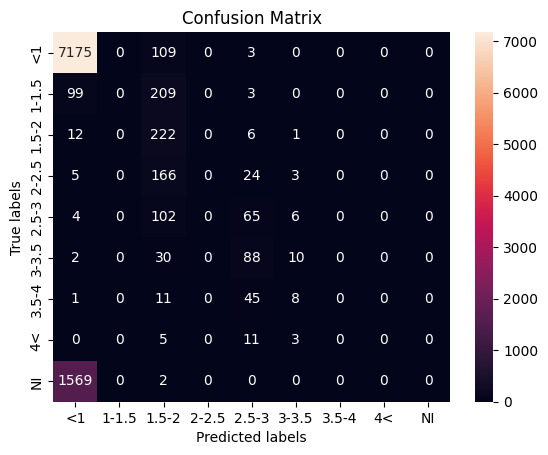

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(test2, y_pred2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);
ax.yaxis.set_ticklabels(["<1", "1-1.5", "1.5-2", "2-2.5", "2.5-3", "3-3.5", "3.5-4", "4<", "NI"]);

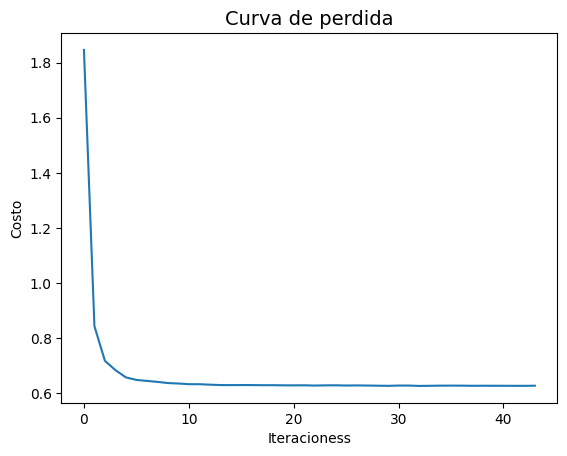

In [116]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

El modelo que tiene mayor exactitud, a pesar de que en el test ambos tengan 0.75, gracias a la matriz de confusion de los modelos, se puede llegar a que el primer modelo acertó en 7499 casos, mientras que el segundo modelo acertó en 7472. Es una diferencia pequeña de 27 casos, pero muestra que el primer modelo es mas exacto.
Analizando las curvas de perdida, se ve que convergen en menos de 10 iteraciones, lo que muestra un no-buen ajueste, ya que converge demasiado rápido.